In [1]:
#IMPORT LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes-dataset.csv')

In [4]:
print("First 5 rows of the dataset:")
print(df.head())

print("\nInformation about the dataset:")
print(df.info())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0  

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies          

In [5]:
cols_to_impute = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Glucose'] # Added Glucose as it can also have 0
for col in cols_to_impute:
    df[col] = df[col].replace(0, np.nan)

print("\nMissing values after replacing 0s:")
print(df.isnull().sum())


Missing values after replacing 0s:
Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [6]:
for col in cols_to_impute:
    df[col] = df[col].fillna(df[col].median())

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
for col in cols_to_impute + ['Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'Outcome']:
    df[col] = pd.to_numeric(df[col])

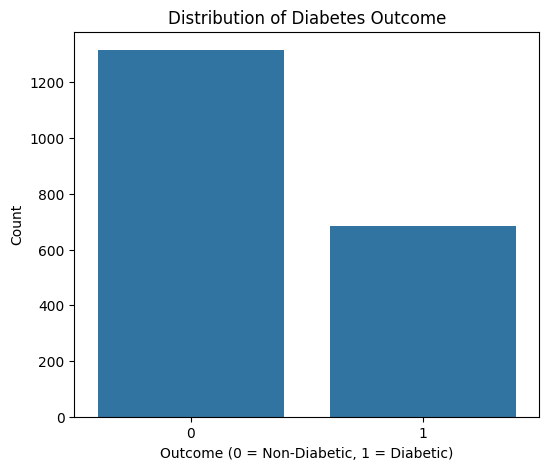

In [10]:
#BAR CHART
plt.figure(figsize=(6, 5))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Count')
plt.show()

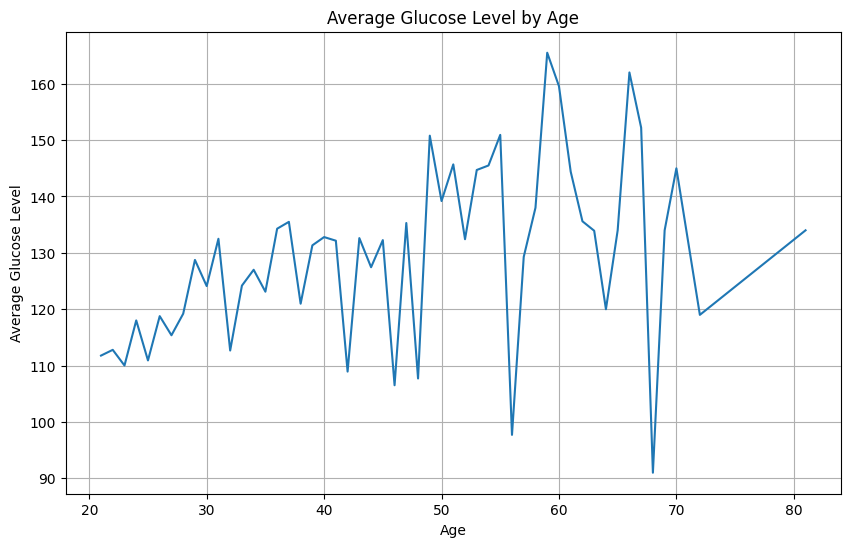

In [12]:
#LINE CHART
plt.figure(figsize=(10, 6))
# Menghitung rata-rata Glukosa untuk setiap kelompok usia
age_glucose_avg = df.groupby('Age')['Glucose'].mean().reset_index()
sns.lineplot(x='Age', y='Glucose', data=age_glucose_avg)
plt.title('Average Glucose Level by Age')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.grid(True)
plt.show()

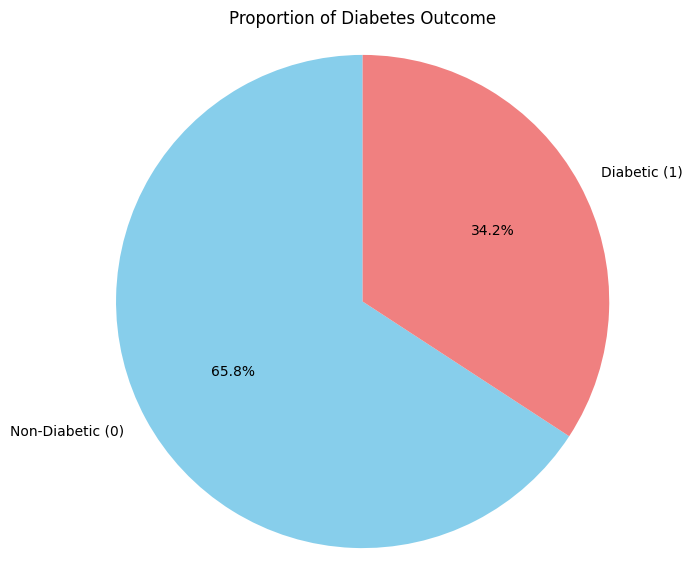

In [13]:
#PIE CHART
plt.figure(figsize=(7, 7))
outcome_counts = df['Outcome'].value_counts()
outcome_labels = ['Non-Diabetic (0)', 'Diabetic (1)']
plt.pie(outcome_counts, labels=outcome_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Diabetes Outcome')
plt.axis('equal')
plt.show()